In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
sample_path = r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\synth_datasets\synth_seg_style"
imPath = os.path.join(sample_path,r"images\20220605231413_000097_Trim_frame22.jpg")
txtPath = os.path.join(sample_path,r"labels\20220605231413_000097_Trim_frame22.txt")
image = cv2.imread(imPath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [2]:
anns = list(pd.read_csv(txtPath, header=None, delimiter= ' ').values)

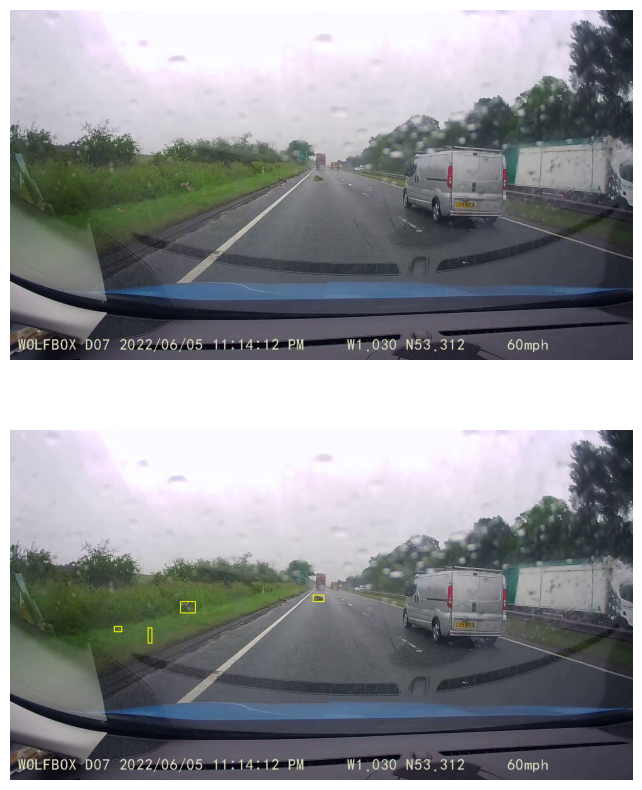

In [3]:
#https://stackoverflow.com/questions/64096953/how-to-convert-yolo-format-bounding-box-coordinates-into-opencv-format
# Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
# via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
#visualise bounding box

#cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 00), 2)

def visualize(image):
    plt.axis('off')
    plt.imshow(image)
    
def unnormbb(im, annotation): #unnormalises bounding box coords
    dh, dw, _ = im.shape

    x = annotation[0]
    y = annotation[1]
    w = annotation[2]
    h = annotation[3]

    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)

    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1
        
    return l,r,t,b

def displaybbox(im,annotation): #creates image with bounding box coordinates
    l,r,t,b = unnormbb(im,annotation)
    to_bbox = im.copy()
    bbImage = cv2.rectangle(to_bbox, (l, t), (r, b), (255, 255, 0), 2)
    return bbImage

im_bb = image

for i in range(len(anns)):
    im_bb = displaybbox(im_bb.copy(),anns[i][1:])

plt.figure(figsize=(10, 10))
        
plt.subplot(2,1,1)
visualize(image)
plt.subplot(2,1,2)
visualize(im_bb)